In [1]:
import xgboost as xgb
import pandas as pd
import shap
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
X_sample = pd.read_csv("../model outputs/shap_X_sample_final.csv",index_col=0)

In [3]:
df_train = pd.read_csv("../model outputs/shap_df_sample_final.csv",index_col=0)

In [4]:
shap_values = np.loadtxt("../model outputs/shap_values_final.csv",delimiter=',')
df_shap = pd.DataFrame(shap_values)
df_shap.columns = 'SHAP ' + X_sample.columns

In [7]:
X_sample.columns = ['Trip distance', 'Trip direction', 'Trip base fare', 'Additional charges',
                    
        'Workday', 'Month', 'Hour', 'Hourly temp', 'Hourly wind', 'Hourly rain',
                    
        'Metro O','Metro D','Dist to DT O','Dist to DT D',
                    
       'Pct bach D', 'Median income D', 'Sex ratio_D',       
       'Pct non white D', 'Pct age 18-29 D', 'Pct no car D',
                    
       'Pct bach O', 'Median income O', 'Sex ratio_O',
       'Pct non white O', 'Pct age 18-29 O', 'Pct no car O',
           
       'Residential density D' , 'Empoloyment density D', 'Network density D',
        'Dist to transit D', 'Walkability D',
           
       'Residential density O' , 'Empoloyment density O', 'Network density O',
        'Dist to transit O', 'Walkability O',
       ]


In [8]:
X_sample['Median income O'] = X_sample['Median income O'] / 1000
X_sample['Median income D'] = X_sample['Median income D'] / 1000

In [9]:
def odds(arr):
    odds = np.exp(arr)
    return odds/(1+odds) - 0.5

In [10]:
X_sample.columns

Index(['Trip distance', 'Trip direction', 'Trip base fare',
       'Additional charges', 'Workday', 'Month', 'Hour', 'Hourly temp',
       'Hourly wind', 'Hourly rain', 'Metro O', 'Metro D', 'Dist to DT O',
       'Dist to DT D', 'Pct bach D', 'Median income D', 'Sex ratio_D',
       'Pct non white D', 'Pct age 18-29 D', 'Pct no car D', 'Pct bach O',
       'Median income O', 'Sex ratio_O', 'Pct non white O', 'Pct age 18-29 O',
       'Pct no car O', 'Residential density D', 'Empoloyment density D',
       'Network density D', 'Dist to transit D', 'Walkability D',
       'Residential density O', 'Empoloyment density O', 'Network density O',
       'Dist to transit O', 'Walkability O'],
      dtype='object')

In [11]:
shap_grouped = np.zeros((300000,5))

In [12]:
shap_grouped[:,0] = shap_values[:,2] + shap_values[:,3] #trip cost
shap_grouped[:,1] = shap_values[:,0] + shap_values[:,1] + np.sum(shap_values[:,12:14],axis=1) #trip attr
shap_grouped[:,2] = np.sum(shap_values[:,4:10],axis=1) #temporal
shap_grouped[:,3] = np.sum(shap_values[:,14:26],axis=1) #sicio-econ
shap_grouped[:,4] = np.sum(shap_values[:,26:],axis=1) #built-env

In [13]:
grouped_names = ['Trip cost','Trip attributes','Temporal attributes','Socioeconomics','Built-environment']

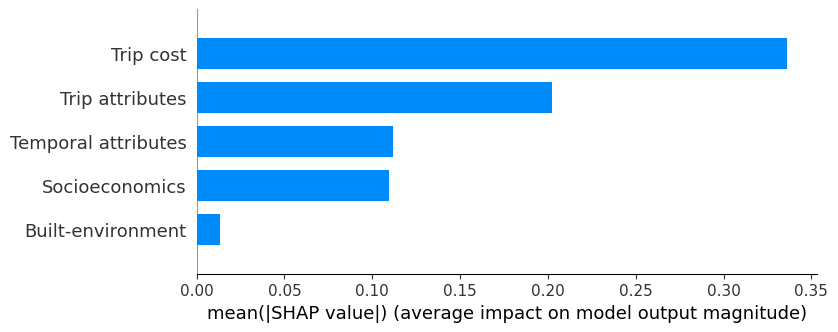

In [14]:
fig, ax=plt.subplots(dpi=100)
shap.summary_plot(odds(shap_grouped), grouped_names, plot_type="bar")

In [15]:
from scipy.stats import gaussian_kde

def plot(j, ylim=None,xlim=None,inter=None):
    
    fig, ax=plt.subplots(dpi=150,figsize=(6,4))
    x = X_sample.iloc[:,j].values.reshape(-1).astype(int)

    ax.axhline(0, linestyle='--',color='black')
    if ylim:
        ax.set_ylim(ylim)
    if xlim:
        ax.set_xlim(xlim)
    
    shap.dependence_plot(j, odds(shap_values), X_sample, ax=ax, interaction_index=inter)

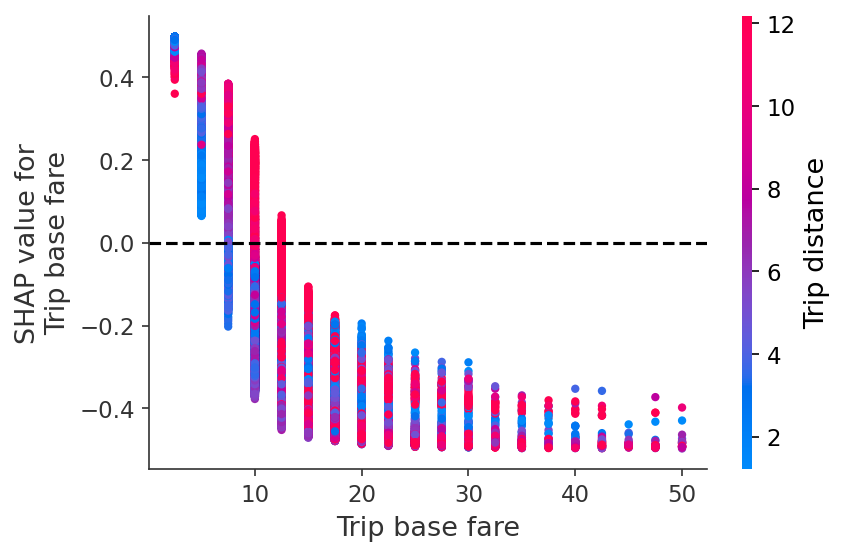

In [16]:
plot(2, inter=0)

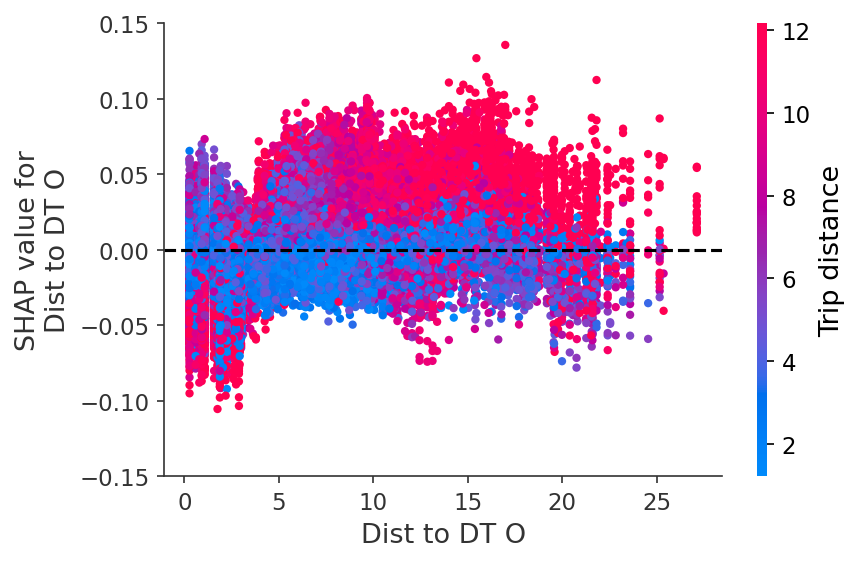

In [54]:
plot(12, inter=0,ylim=(-0.15,0.15))

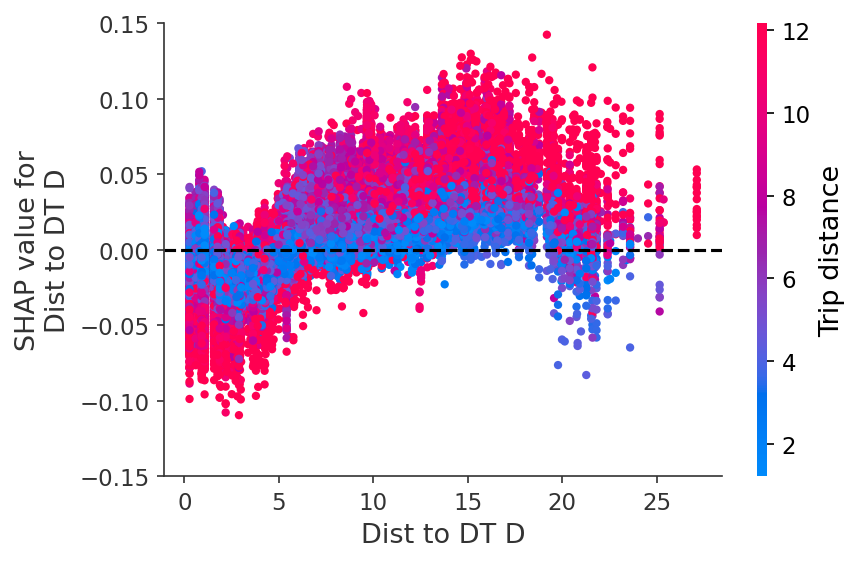

In [56]:
plot(13, inter=0,ylim=(-0.15,0.15))

Text(0.5, -0.2, 'Probability to share vs. Trip direction')

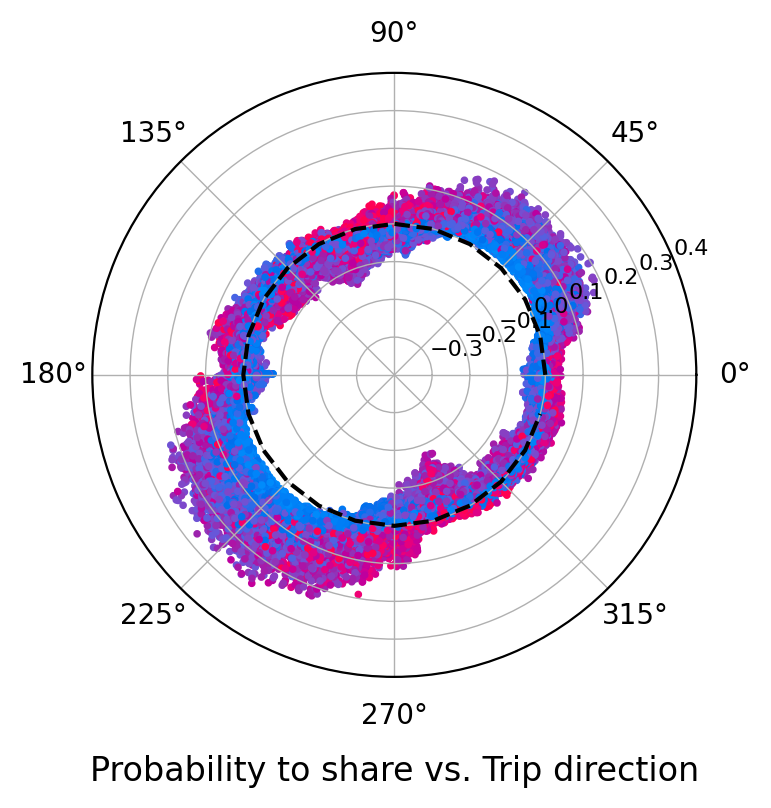

In [20]:
from shap.plots import colors
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=200)

x = np.radians(X_sample.iloc[:,1].values.reshape(-1))
y = odds(shap_values[:,1]).reshape(-1)

ax.set_ylim(-0.4, 0.4)

ax.grid(linewidth=0.5)

#den_plot(ax,x,y)

#shap.dependence_plot(1, odds(shap_values), X_sample, ax=ax, interaction_index=0)

ax.scatter(x, y, s=3, c=X_sample.iloc[:,0].values.reshape(-1),cmap=colors.red_blue_no_bounds,vmin=1,vmax=13)

ax.tick_params(axis='y', which='major', labelsize=8)

equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)*0

ax.plot(np.deg2rad(equals), ones,linestyle='--',color='black')

ax.set_title("Probability to share vs. Trip direction",y=-0.2)

# Socio-econs

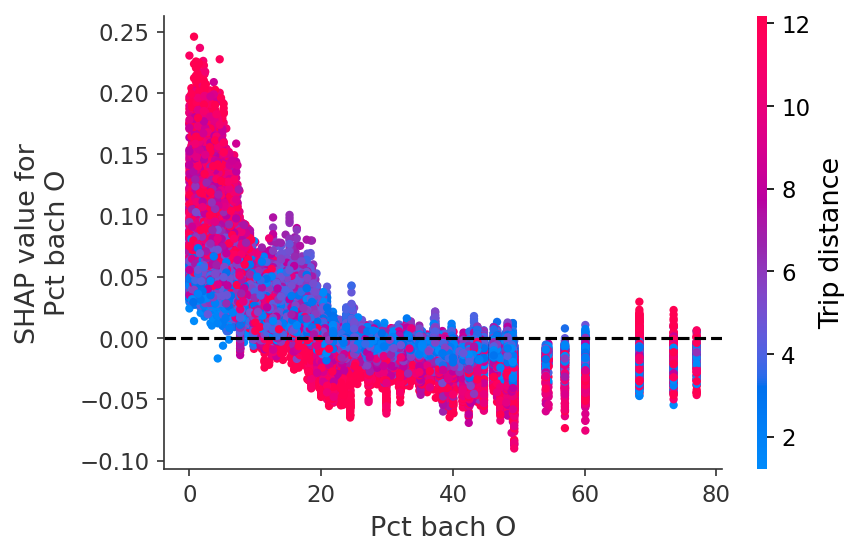

In [21]:
plot(20, inter=0)

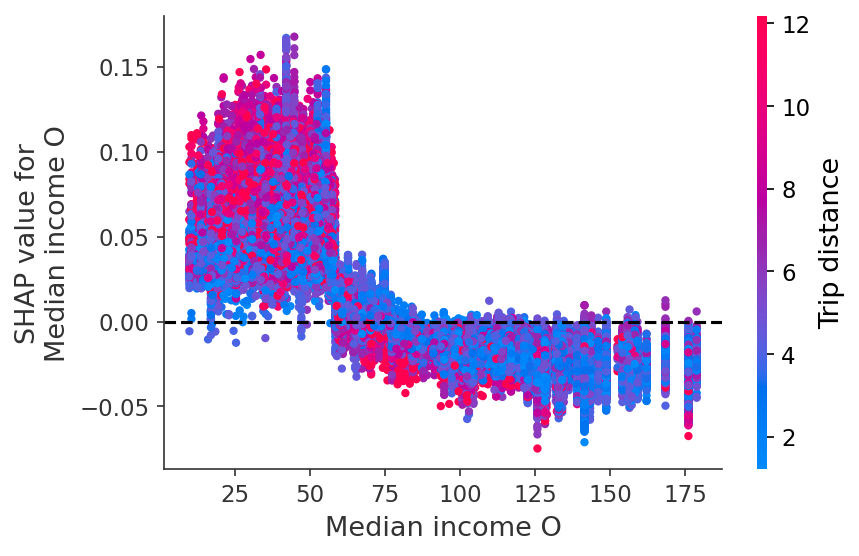

In [22]:
plot(21, inter=0)

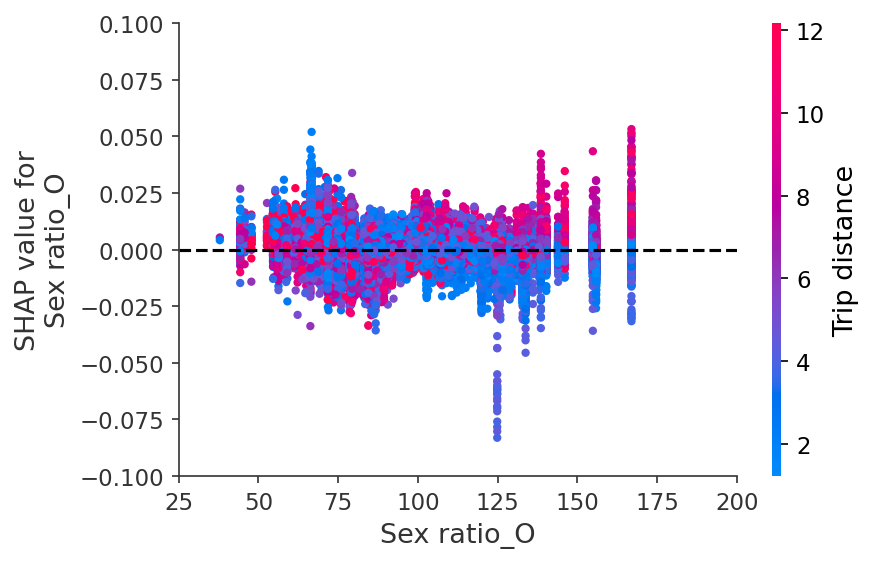

In [40]:
plot(22, inter=0,xlim=(25,200),ylim=(-0.1,0.1))

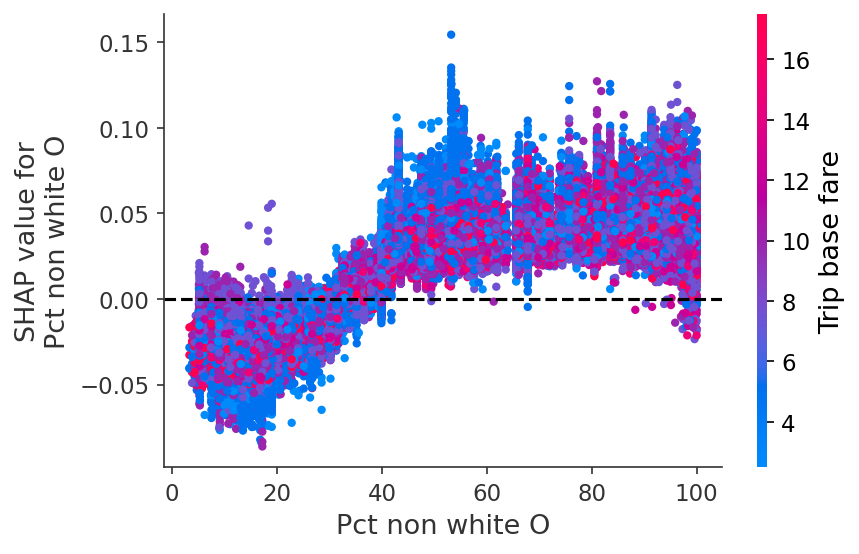

In [24]:
plot(23, inter=2)

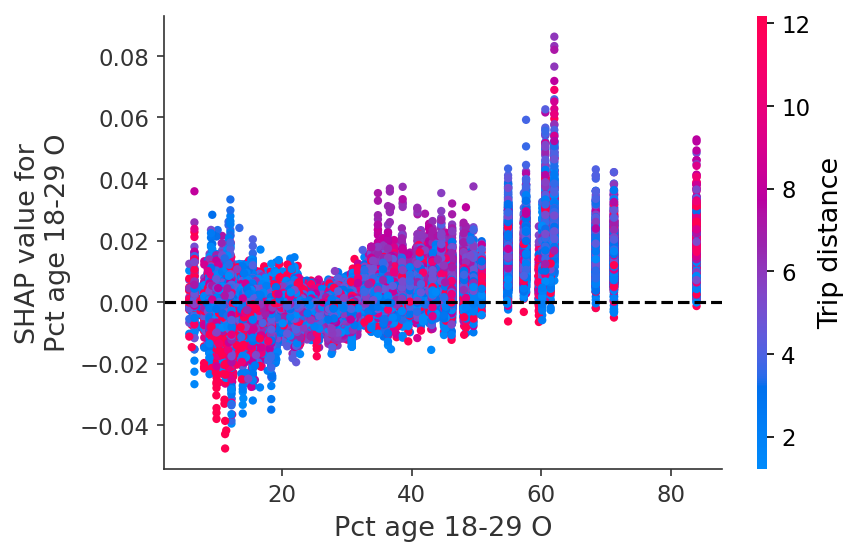

In [25]:
plot(24, inter=0)

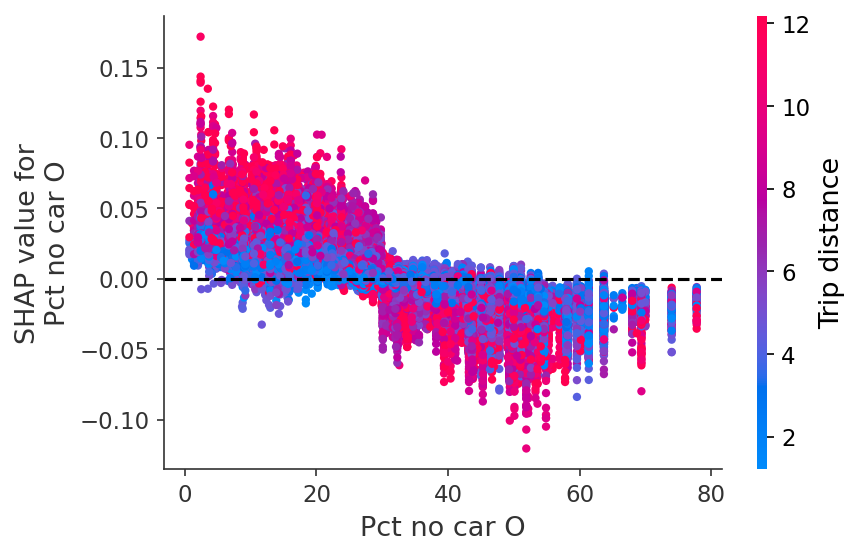

In [26]:
plot(25, inter=0)

# Temporal

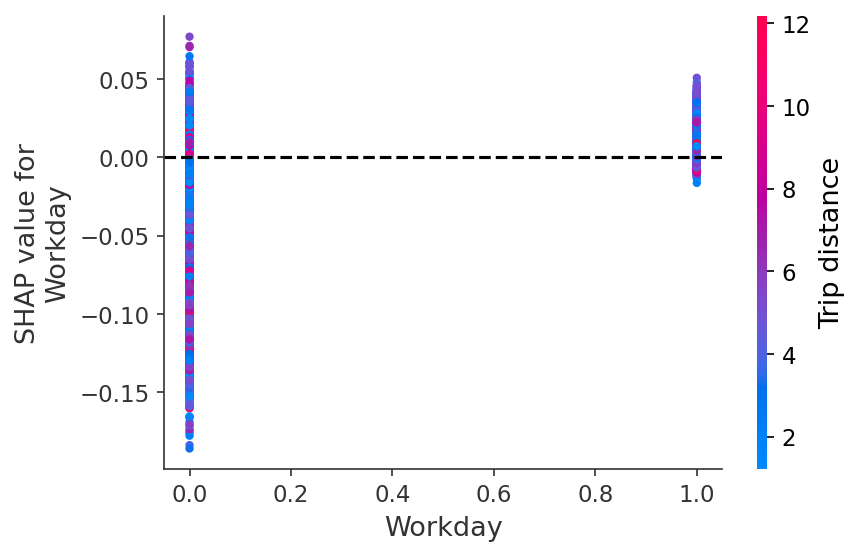

In [27]:
plot(4, inter=0)

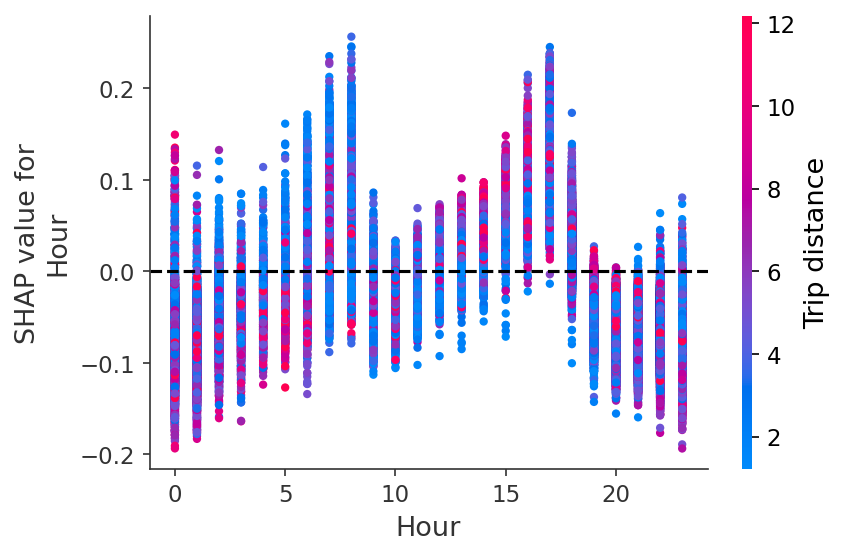

In [28]:
plot(6, inter=0)

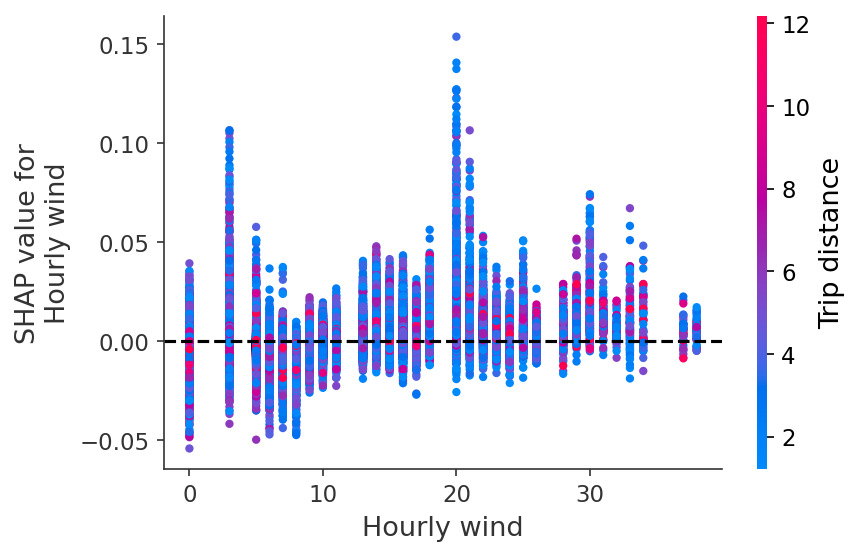

In [29]:
plot(8, inter=0)

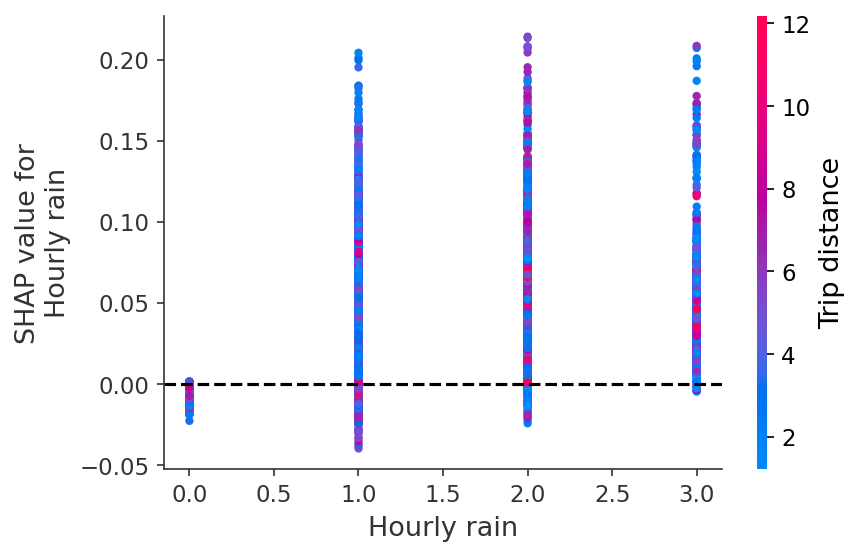

In [30]:
plot(9, inter=0)

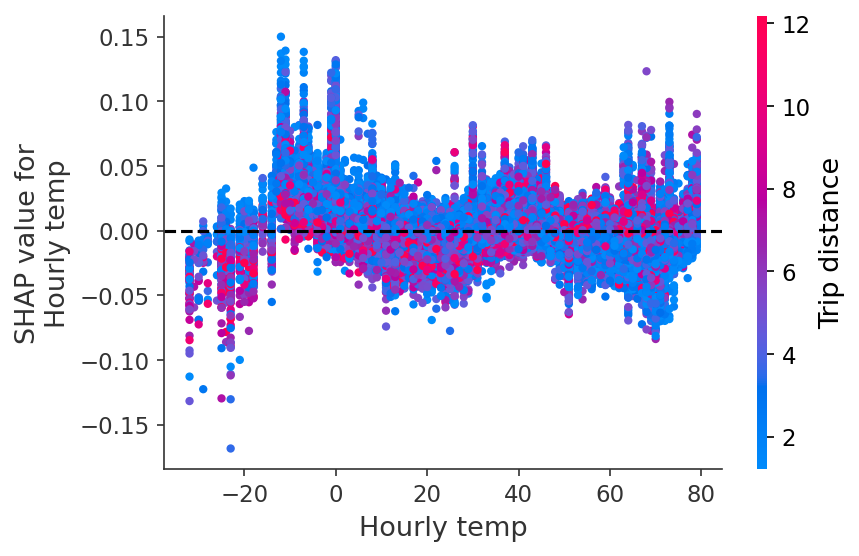

In [31]:
plot(7, inter=0)

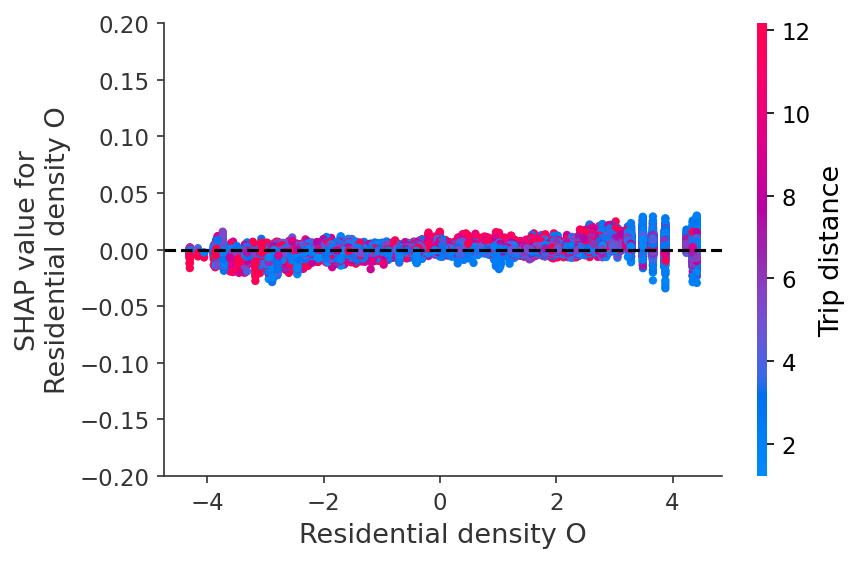

In [52]:
plot(31, inter=0,ylim=(-0.2,0.2))

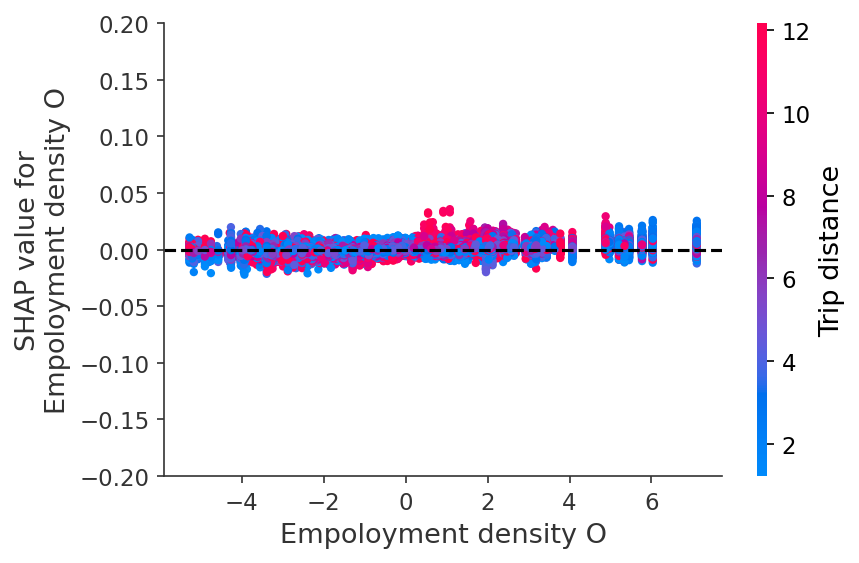

In [51]:
plot(32, inter=0,ylim=(-0.2,0.2))

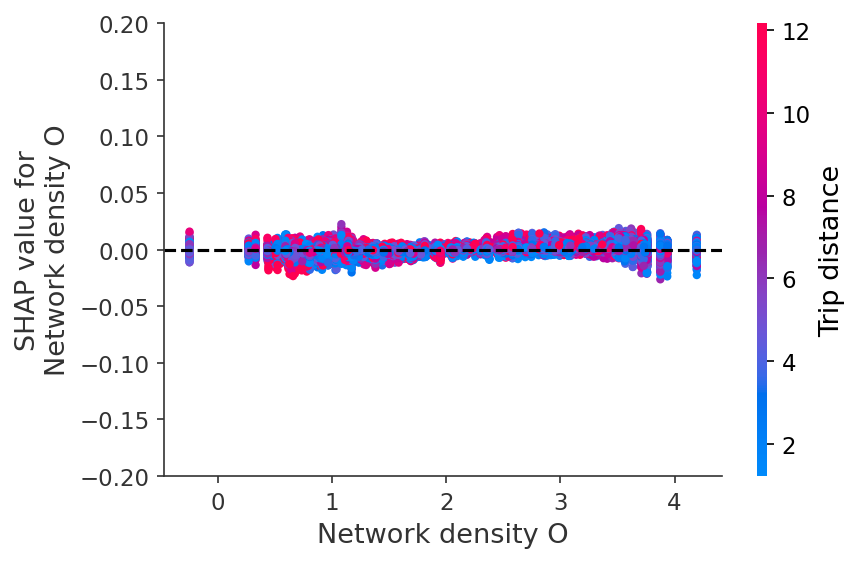

In [50]:
plot(33, inter=0,ylim=(-0.2,0.2))

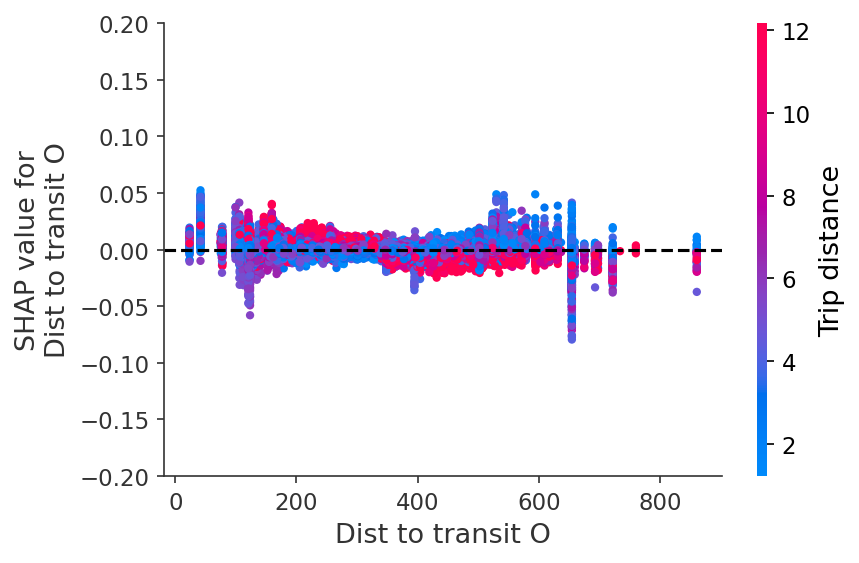

In [45]:
plot(34, inter=0,ylim=(-0.2,0.2))

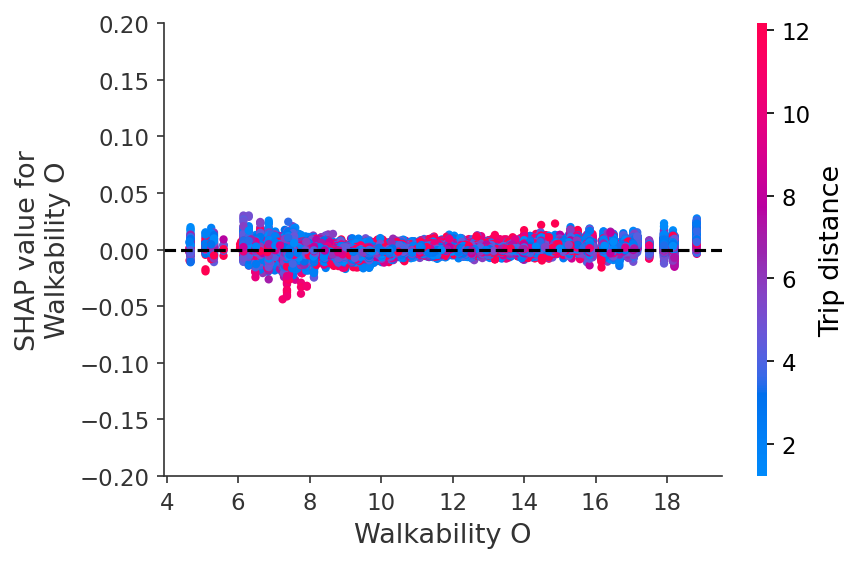

In [48]:
plot(35, inter=0,ylim=(-0.2,0.2))

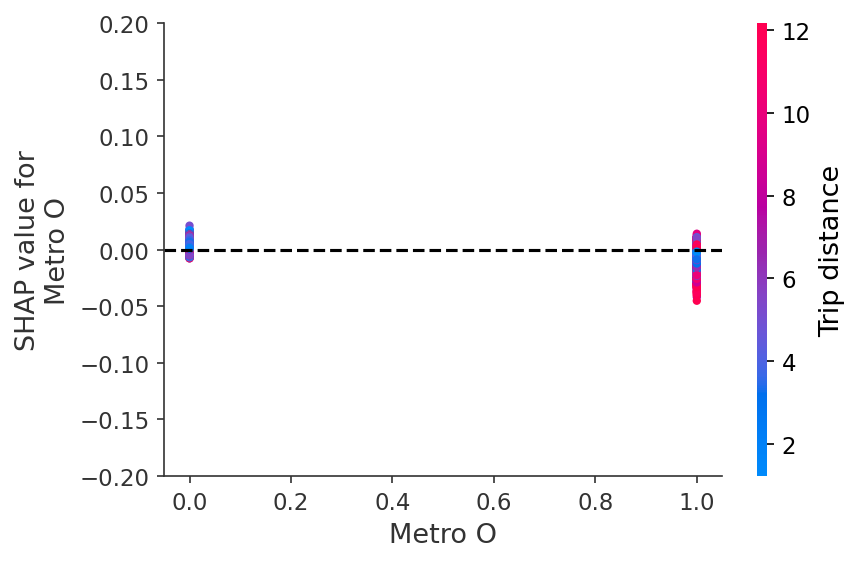

In [53]:
plot(10, inter=0,ylim=(-0.2,0.2))